## 1. Dados e visualizações

**Importando os dados e visualizando os dados:**

In [1]:
import pandas as pd

notas = pd.read_csv('dados/curso1/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**Checando o tamanho do DataFrame:**

In [2]:
print(f'Temos {notas.shape[0]} linhas e {notas.shape[1]} colunas no nosso DataFrame')

Temos 100836 linhas e 4 colunas no nosso DataFrame


**Traduzindo o nome das colunas:**

In [3]:
notas.columns = ['usuarioID', 'filmeID', 'nota','momento']

In [4]:
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**Descobrindo os valores possíveis de notas:**

In [5]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

As notas variam entre 0.5 até 5.0 !

**Descobrindo quantas vezes apareceu cada nota:**

In [6]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

**Descobrindo a média de todas as notas:**

In [7]:
print('A média de notas é: ', round(notas['nota'].mean(),2))

A média de notas é:  3.5


**Explorando as notas de maneira visual:**

<AxesSubplot: ylabel='Frequency'>

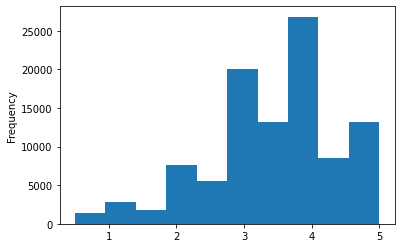

In [8]:
notas['nota'].plot(kind='hist')

**Explorando a mediana do dataset:**

In [9]:
print('A mediana é: ', notas['nota'].median())

A mediana é:  3.5


**Obtendo diversas medidas de descrição do dataset:**

In [10]:
notas.describe()

,usuarioID,filmeID,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


**Importando a biblioteca Seaborn e plotando um boxplot do nosso dataset:**

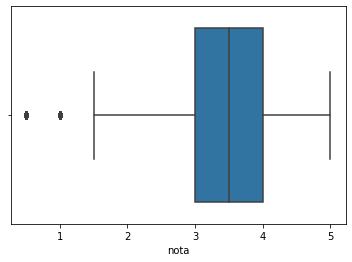

In [11]:
import seaborn as sns

sns.boxplot(x = notas['nota']);

## 2. Análise Exploratória

**Importando outra base de dados:**

In [12]:
filmes = pd.read_csv('dados/curso1/movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**Mudando os nomes das colunas:**

In [13]:
filmes.columns = ['filmeID','titulo','genero']
filmes.head()

,filmeID,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**Tirando a média de notas de alguns filmes:**

In [14]:
notas.query('filmeID==1')['nota'].mean()

3.9209302325581397

In [15]:
notas.query('filmeID==2')['nota'].mean()

3.4318181818181817

In [16]:
medias_por_filme = notas.groupby('filmeID')['nota'].mean()
medias_por_filme.head()

filmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

**Plotando as médias por filme:**

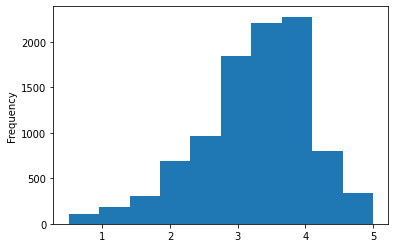

In [17]:
medias_por_filme.plot(kind='hist');

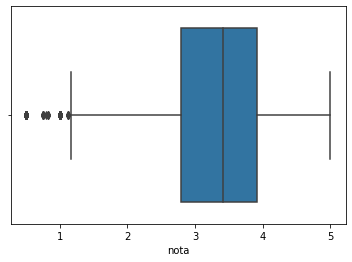

In [18]:
sns.boxplot(x=medias_por_filme);

**Para ver os valores exatos da mediana e os seus quartis:**

In [19]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

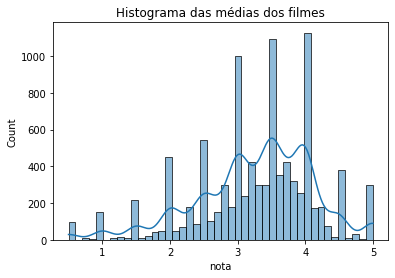

In [20]:
import matplotlib.pyplot as plt
sns.histplot(x=medias_por_filme, kde=True);
plt.title('Histograma das médias dos filmes');

## 3. Variáveis

**Importando dataset:**

In [21]:
tmdb = pd.read_csv('dados/curso1/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


**Vendo as línguas de todos os filmes:**

In [22]:
tmdb['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

**Distribuição de línguas dos filmes:**

In [23]:
tmdb['original_language'].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

**Variáveis Categóricas:** são aquelas que não possuem valores quantitativos, são definidas por várias categorias. Podem ser nominais ou ordinais.

**Ordinais:** quando existe uma ordenação entre categorias (Fundamental < Ensino Médio < Ensino Superior)

**Nominais:** não possuem uma ordem (Loiro, Preto, Castanho)

## 4. Data Visualization

**Transformando em um DataFrame:**

In [24]:
contagem_linguas = tmdb['original_language'].value_counts().to_frame()
contagem_linguas.head()

,original_language
en,4505
fr,70
es,32
zh,27
de,27


**Resetando o index:**

In [25]:
contagem_linguas = contagem_linguas.reset_index()
contagem_linguas.head()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


**Renomeando colunas**:

In [26]:
contagem_linguas.columns = ['lingua', 'frequencia']
contagem_linguas.head()

,lingua,frequencia
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


**Plotando um gráfico de barras das línguas dos filmes do tmdb:**

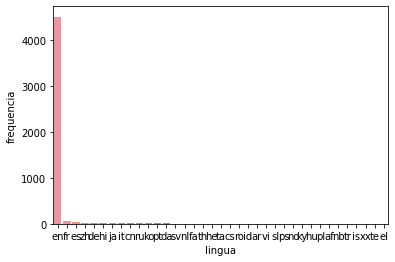

In [27]:
sns.barplot(data=contagem_linguas, x='lingua', y='frequencia');

**Comparar a língua inglesa com as demais línguas:**

In [28]:
outras_linguas = contagem_linguas.query('lingua != "en"')
outras_linguas

,lingua,frequencia
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11
10,ko,11


In [29]:
ingles = contagem_linguas.query('lingua == "en"')
ingles

,lingua,frequencia
0,en,4505


**Criando um dicionário e transformando para DataFrame com os valores desejados:**

In [30]:
dados = {
    'lingua': ['ingles', 'outras'],
    'frequencia': [ingles['frequencia'].sum(), outras_linguas['frequencia'].sum()]
}
dados

{'lingua': ['ingles', 'outras'], 'frequencia': [4505, 298]}

In [31]:
dados = pd.DataFrame(dados)
dados

,lingua,frequencia
0,ingles,4505
1,outras,298


**Plotando um gráfico de barras para comparar a língua inglesa com as demais:**

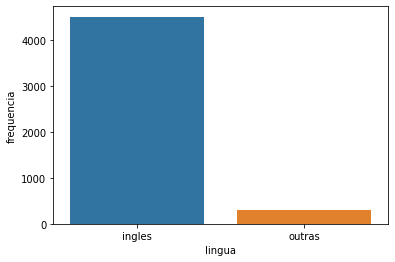

In [32]:
sns.barplot(data = dados, x = 'lingua', y = 'frequencia');

**Entre as outras línguas, como está essa distribuição?**

<AxesSubplot: xlabel='lingua', ylabel='frequencia'>

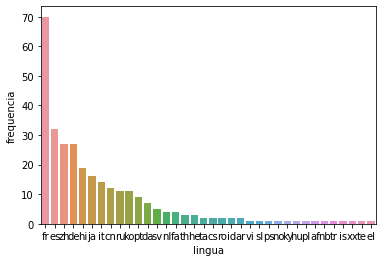

In [33]:
sns.barplot(data = outras_linguas, x = 'lingua', y = 'frequencia')

## 5. Continuando com Visualização

**Refinando o gráfico:**

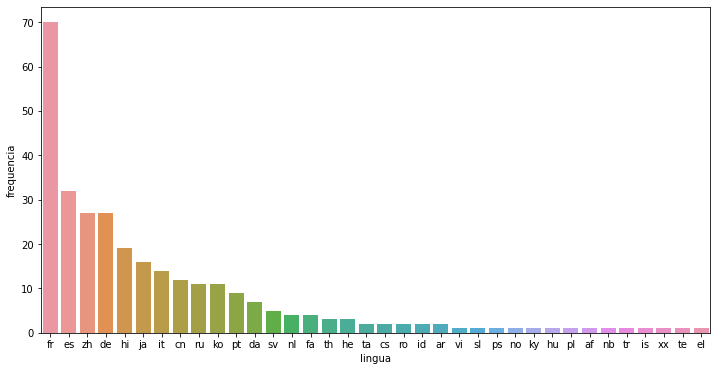

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data = outras_linguas, x = 'lingua', y = 'frequencia')
plt.show()

**Mudando paleta de cores do gráfico:**

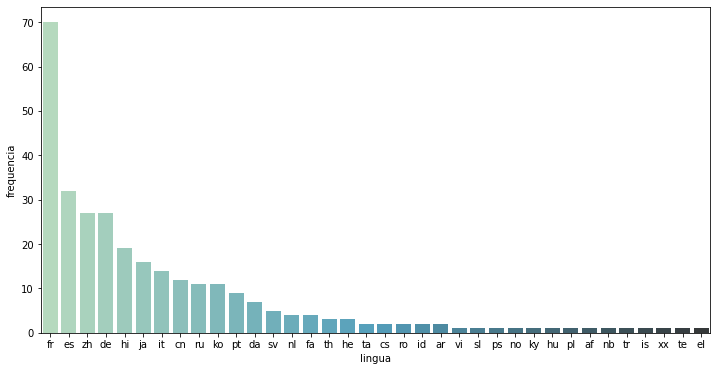

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data = outras_linguas, x = 'lingua', y = 'frequencia', palette='GnBu_d')
plt.show()

## 6. Dados e Estatística:

**Observando alguns filmes específicos:**

In [36]:
filmes.head(2)

,filmeID,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [37]:
notas.head(2)

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [38]:
notas_toy_story = notas.query('filmeID == 1')
notas_jumanji = notas.query('filmeID == 2')

**Qual a media de notas desses filmes?**

In [39]:
print('Nota média do Toy Story:', round(notas_toy_story['nota'].mean(),2))
print('Nota média do Jumanji:', round(notas_jumanji['nota'].mean(),2))

Nota média do Toy Story: 3.92
Nota média do Jumanji: 3.43


**Qual a mediana de notas desses filmes?**

In [40]:
print('Nota média do Toy Story:', round(notas_toy_story['nota'].median(),2))
print('Nota média do Jumanji:', round(notas_jumanji['nota'].median(),2))

Nota média do Toy Story: 4.0
Nota média do Jumanji: 3.5


**Plotando Boxplot de ambos os filmes**

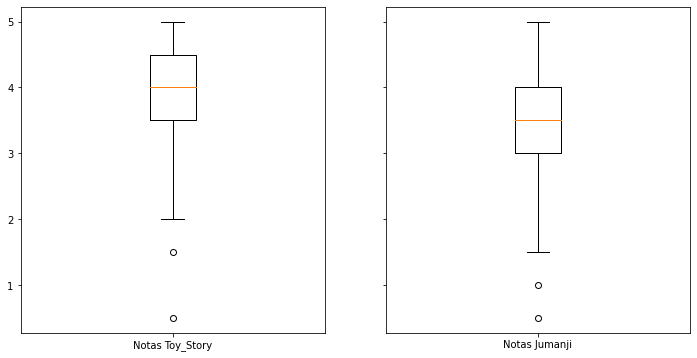

In [41]:
fig, (ax1,ax2) = plt.subplots(figsize=(12, 6), ncols=2, sharey=True);
ax1.boxplot(x=notas_toy_story['nota'], labels=['Notas Toy_Story']);
ax2.boxplot(x=notas_jumanji['nota'],  labels=['Notas Jumanji']);

<AxesSubplot: xlabel='filmeID', ylabel='nota'>

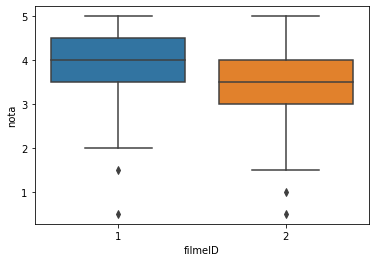

In [42]:
sns.boxplot(x='filmeID',y='nota', data=notas.query('filmeID in [1,2]'))

**Checando o desvio padrão dos filmes:**

In [43]:
print('O Desvio padrão do filme Toy Story é: ', notas_toy_story['nota'].std())
print('O Desvio padrão do filme Jumanji é: ', notas_jumanji['nota'].std())

O Desvio padrão do filme Toy Story é:  0.8348591407114045
O Desvio padrão do filme Jumanji é:  0.8817134921476455
